In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
biden_df = pd.read_csv('hashtag_joebiden.csv', lineterminator='\n')
biden_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [3]:
trump_df = pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n')
trump_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [4]:

full = biden_df.append(trump_df)

In [5]:
#most common hastags in biden df
words = []
for tweet in biden_df['tweet']:
    words.extend(re.findall(r"#(\w+)", tweet))
Counter(words).most_common(50)

[('Biden', 434360),
 ('JoeBiden', 271813),
 ('Trump', 156431),
 ('Election2020', 82153),
 ('biden', 62813),
 ('Elections2020', 48300),
 ('BidenHarris2020', 48065),
 ('DonaldTrump', 36365),
 ('KamalaHarris', 33107),
 ('trump', 32803),
 ('ElectionDay', 28986),
 ('joebiden', 23135),
 ('Trump2020', 23039),
 ('USA', 19919),
 ('BidenHarris', 18974),
 ('Biden2020', 18406),
 ('ElectionNight', 17879),
 ('USElection2020', 17075),
 ('bidenharis2020', 14777),
 ('Elecciones2020', 14361),
 ('vote', 14000),
 ('ElectionResults2020', 13039),
 ('USAElections2020', 12984),
 ('Debates2020', 12222),
 ('VOTE', 11885),
 ('Election2020results', 11813),
 ('HunterBiden', 11265),
 ('USAelection2020', 11175),
 ('Vote2020', 10683),
 ('JoeBidenKamalaHarris2020', 10680),
 ('America', 10658),
 ('COVID19', 10146),
 ('Harris', 10012),
 ('Democrats', 9907),
 ('TrumpvsBiden', 9218),
 ('Vote', 8817),
 ('elections', 8809),
 ('USElections2020', 8785),
 ('BIDEN', 8755),
 ('JOEBIDEN2020', 8515),
 ('Pennsylvania', 8424),
 ('By

In [6]:
#most common hastags in trump df
words = []
for tweet in trump_df['tweet']:
    words.extend(re.findall(r"#(\w+)", tweet))
Counter(words).most_common(50)

[('Trump', 700744),
 ('Biden', 148368),
 ('trump', 144107),
 ('DonaldTrump', 122269),
 ('Election2020', 86052),
 ('Elections2020', 54036),
 ('JoeBiden', 49638),
 ('Trump2020', 41823),
 ('ElectionDay', 35249),
 ('MAGA', 28600),
 ('BidenHarris2020', 28382),
 ('USA', 27306),
 ('biden', 26862),
 ('COVID19', 25897),
 ('TRUMP', 22486),
 ('ElectionNight', 20805),
 ('USElection2020', 18885),
 ('Elecciones2020', 17122),
 ('TrumpMeltdown', 16062),
 ('ElectionResults2020', 16058),
 ('USAElections2020', 14878),
 ('America', 14142),
 ('VOTE', 14041),
 ('vote', 13579),
 ('Biden2020', 13296),
 ('GOP', 13229),
 ('TrumpvsBiden', 12468),
 ('Debates2020', 12083),
 ('donaldtrump', 11847),
 ('MAGA2020', 10899),
 ('USElections2020', 10610),
 ('Vote2020', 10343),
 ('TrumpIsLosing', 9836),
 ('elections', 9831),
 ('election', 9794),
 ('coronavirus', 9702),
 ('BidenHarris', 9216),
 ('maga', 9145),
 ('Election2020results', 8821),
 ('Vote', 8550),
 ('Democrats', 8281),
 ('USElection', 8269),
 ('USAelection2020', 

In [7]:
#Election2020
#Elections2020
#ElectionDay
#USA
#USElection2020
#USAElections2020
#Elecciones2020
#ElectionNight
#Vote2020
#Pennsylvania
#Debates2020



In [8]:
swing_trump_df = trump_df[(trump_df['state'] == 'Michigan') | (trump_df['state'] == 'Pennsylvania') | 
                    (trump_df['state'] == 'Wisonsin')]
#most common hastags in swing_trump_df
words = []
for tweet in swing_trump_df['tweet']:
    words.extend(re.findall(r"#(\w+)", tweet))
Counter(words).most_common(50)

[('Trump', 7227),
 ('trump', 1652),
 ('DonaldTrump', 1239),
 ('Biden', 1061),
 ('COVID19', 895),
 ('Election2020', 688),
 ('Trump2020', 367),
 ('MAGA', 359),
 ('BLM', 353),
 ('JoeBiden', 333),
 ('BidenHarris2020', 325),
 ('Plan', 310),
 ('Violence', 289),
 ('SystemicRacism', 288),
 ('MedicalProfessionals', 287),
 ('VOTE', 280),
 ('biden', 252),
 ('TRUMP', 246),
 ('Republicans', 225),
 ('Pennsylvania', 210),
 ('Vote', 203),
 ('vote', 168),
 ('Elections2020', 167),
 ('COVID', 162),
 ('America', 160),
 ('coronavirus', 159),
 ('MAGA2020', 158),
 ('TrumpMeltdown', 158),
 ('maga', 152),
 ('ElectionDay', 148),
 ('2020Election', 141),
 ('election', 141),
 ('USA', 140),
 ('Biden2020', 134),
 ('Debates2020', 134),
 ('BidenHarris', 133),
 ('Florida', 133),
 ('GOP', 132),
 ('news', 132),
 ('potus', 132),
 ('Healthcare', 132),
 ('VoteHimOut', 131),
 ('ElectionResults2020', 131),
 ('Michigan', 128),
 ('ACA', 125),
 ('potus45', 122),
 ('Americans', 118),
 ('racism', 116),
 ('TrumpIsLosing', 112),
 ('

In [9]:
swing_biden_df = biden_df[(biden_df['state'] == 'Michigan') | (biden_df['state'] == 'Pennsylvania') | 
                    (biden_df['state'] == 'Wisonsin')]
#most common hastags in swing_biden_df
words = []
for tweet in swing_biden_df['tweet']:
    words.extend(re.findall(r"#(\w+)", tweet))
Counter(words).most_common(50)

[('Biden', 4349),
 ('JoeBiden', 3326),
 ('Trump', 1212),
 ('Election2020', 815),
 ('BidenHarris2020', 748),
 ('biden', 681),
 ('KamalaHarris', 326),
 ('trump', 319),
 ('joebiden', 261),
 ('BidenHarris', 260),
 ('Vote', 242),
 ('VOTE', 238),
 ('vote', 231),
 ('Elections2020', 211),
 ('DonaldTrump', 208),
 ('Pennsylvania', 199),
 ('Biden2020', 195),
 ('Trump2020', 187),
 ('Debates2020', 182),
 ('HunterBiden', 173),
 ('Michigan', 172),
 ('2020Election', 160),
 ('ElectionDay', 156),
 ('bidenharis2020', 155),
 ('election2020', 137),
 ('Republicans', 134),
 ('BLM', 133),
 ('Democrats', 133),
 ('news', 124),
 ('COVID', 123),
 ('COVID19', 120),
 ('JoeBidenKamalaHarris2020', 114),
 ('BidenHarrisToSaveAmerica', 111),
 ('ElectionResults2020', 108),
 ('racism', 107),
 ('Obama', 106),
 ('Florida', 105),
 ('PresidentElectJoe', 105),
 ('police', 104),
 ('NewYork', 104),
 ('virus', 103),
 ('black', 103),
 ('riots', 103),
 ('Antifa', 102),
 ('CNN', 101),
 ('MAGA', 98),
 ('Harris', 97),
 ('Vote2020', 97

In [11]:
#11/27
#get only swing states
swing_trump_df = trump_df[(trump_df['state'] == 'Michigan') | (trump_df['state'] == 'Pennsylvania') | 
                    (trump_df['state'] == 'Wisconsin')]

#Vader text with sentimental value
sent = pd.read_csv('vader_lexicon.txt', sep = '\t', index_col = 0, 
                    header = None).drop([2,3], axis = 1).rename(columns={1: 'polarity'})

#lower all tweet
swing_trump_df['tweet'] = swing_trump_df['tweet'].str.lower()

#Get rid of all punctutations
punct_re = r'[^(\w)(\s)]'
swing_trump_df['no_punc'] = swing_trump_df['tweet'].str.replace(punct_re, ' ', regex = True) 

#Make new dataframe
tidy_format_trump_df = pd.DataFrame(swing_trump_df['no_punc'].str.split(expand = True).stack()).reset_index(level = 1).rename(columns = {'level_1' : 'num', 0 : 'word'})

tidy_format2_trump_df = tidy_format_trump_df
tidy_format2_trump_df['index'] = tidy_format_trump_df.index

#make polarity column
swing_trump_df['polarity'] = tidy_format2_trump_df.merge(sent, how = 'left', left_on = 'word', right_on = 0).fillna(0).groupby('index').sum()['polarity']
swing_trump_df.head()


/Users/aisetoyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/aisetoyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/aisetoyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,lat,long,city,country,continent,state,state_code,collected_at,no_punc,polarity
8,2020-10-15 00:00:20,1.316529e+18,one of the single most effective remedies to e...,0.0,0.0,Twitter Web App,5.404769e+08,Jamieo,jamieo33,"Don't know what I am. Can lean left and right,...",...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:00:02.985732243,one of the single most effective remedies to e...,2.1
19,2020-10-15 00:01:08,1.316530e+18,"@cnnbrk #trump owes #ricardoaguirre $730,000 t...",3.0,2.0,Twitter for iPhone,1.946504e+08,MoClarker,MoClarker,Media Maven/Scientist/Fan O Fauci,...,47.005211,-88.962910,NaN,United States of America,North America,Michigan,MI,2020-10-21 00:00:07.091114077,cnnbrk trump owes ricardoaguirre 730 000 t...,-4.1
62,2020-10-15 00:03:04,1.316530e+18,#donaldtrump #theinfected @potus is a doofus w...,1.0,0.0,Twitter for Android,2.912734e+09,Diane Harris,DhLadylaw,"🌊🌊🌊Ambassador For Christ,\nProud Mother and Gr...",...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 00:00:23.885857944,donaldtrump theinfected potus is a doofus w...,0.0
75,2020-10-15 00:03:38,1.316530e+18,@joebiden #donaldtrump 4 more years!,0.0,0.0,Twitter Web App,1.657854e+07,Scott Seifferlein,Seifferlein,http://t.co/uScd2xa2,...,42.963241,-85.667864,Grand Rapids,United States of America,North America,Michigan,MI,2020-10-21 00:00:29.110889369,joebiden donaldtrump 4 more years,0.0
111,2020-10-15 00:05:55,1.316531e+18,@cnn @andersoncooper how many #trump young #m...,0.0,0.0,Twitter for iPhone,1.946504e+08,MoClarker,MoClarker,Media Maven/Scientist/Fan O Fauci,...,47.005211,-88.962910,NaN,United States of America,North America,Michigan,MI,2020-10-21 00:00:42.546684463,cnn andersoncooper how many trump young m...,0.0


In [12]:
#11/27
#get only swing states
swing_biden_df = biden_df[(biden_df['state'] == 'Michigan') | (biden_df['state'] == 'Pennsylvania') | 
                    (biden_df['state'] == 'Wisconsin')]

#Vader text with sentimental value
sent = pd.read_csv('vader_lexicon.txt', sep = '\t', index_col = 0, 
                    header = None).drop([2,3], axis = 1).rename(columns={1: 'polarity'})

#lower all tweet
swing_biden_df['tweet'] = swing_biden_df['tweet'].str.lower()

#Get rid of all punctutations
punct_re = r'[^(\w)(\s)]'
swing_biden_df['no_punc'] = swing_biden_df['tweet'].str.replace(punct_re, ' ', regex = True) 

#Make new dataframe
tidy_format_biden_df = pd.DataFrame(swing_biden_df['no_punc'].str.split(expand = True).stack()).reset_index(level = 1).rename(columns = {'level_1' : 'num', 0 : 'word'})

tidy_format2_biden_df = tidy_format_biden_df
tidy_format2_biden_df['index'] = tidy_format_biden_df.index

#make polarity column
swing_biden_df['polarity'] = tidy_format2_biden_df.merge(sent, how = 'left', left_on = 'word', right_on = 0).fillna(0).groupby('index').sum()['polarity']
swing_biden_df.head()

/Users/aisetoyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/aisetoyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/aisetoyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,lat,long,city,country,continent,state,state_code,collected_at,no_punc,polarity
139,2020-10-15 00:09:09,1.316532e+18,the 6 most misleading claims from #joebiden: ...,0.0,0.0,Twitter Web App,409571529.0,Howard Wachtel,mindovermath,Retired college #math professor. Single. Brid...,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 00:01:14.049301472,the 6 most misleading claims from joebiden ...,-1.7
233,2020-10-15 00:14:41,1.316533e+18,politico: #biden campaign ‘would not rule out ...,0.0,0.0,Twitter for iPhone,46162219.0,Lost Owl,lostowl62,"Writing, hiking, biking, maps, the Juniata Riv...",...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:02:03.760720642,politico biden campaign would not rule out ...,0.0
294,2020-10-15 00:17:46,1.316534e+18,disqualified. withdrawal from the race. #joebi...,1.0,0.0,Twitter for iPhone,412296745.0,TheRealJoeBedridden,Immortal_J,"MBA, MIT Business, DU, Small business owner.",...,40.462069,-79.923952,Pittsburgh,United States of America,North America,Pennsylvania,PA,2020-10-21 00:02:36.383839473,disqualified withdrawal from the race joebi...,-1.7
317,2020-10-15 00:19:05,1.316534e+18,#joebiden's homes. the sacrifices of public se...,1.0,2.0,Twitter for Android,90028762.0,Vladz Hammer 🏆 🇺🇸,Vladzhammer,"🎙AMP Podcasting HOF 🏆, CoHost OFR, Conspiracy ...",...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:02:48.293866983,joebiden s homes the sacrifices of public se...,-1.5
396,2020-10-15 00:23:31,1.316535e+18,#memes #this #biden https://t.co/enkuzxobqg,0.0,0.0,Twitter for Android,137851125.0,Mandi💙💙💙🌊🌊🌊🦄🦄👽👽❤💚🧡💜,FaerieGlitter21,True and Blue girl from #Michigan #resistance ...,...,42.331551,-83.046640,Detroit,United States of America,North America,Michigan,MI,2020-10-21 00:03:29.720049625,memes this biden https t co enkuzxobqg,0.0


In [13]:
#11/27
#get only swing states
swing_full = full[(full['state'] == 'Michigan') | (full['state'] == 'Pennsylvania') | 
                    (full['state'] == 'Wisconsin')]

#Vader text with sentimental value
sent = pd.read_csv('vader_lexicon.txt', sep = '\t', index_col = 0, 
                    header = None).drop([2,3], axis = 1).rename(columns={1: 'polarity'})

#lower all tweet
swing_full['tweet'] = swing_full['tweet'].str.lower()

#Get rid of all punctutations
punct_re = r'[^(\w)(\s)]'
swing_full['no_punc'] = swing_full['tweet'].str.replace(punct_re, ' ', regex = True) 

#Make new dataframe
tidy_format_full = pd.DataFrame(swing_full['no_punc'].str.split(expand = True).stack()).reset_index(level = 1).rename(columns = {'level_1' : 'num', 0 : 'word'})

tidy_format2_full = tidy_format_full
tidy_format2_full['index'] = tidy_format_full.index

#make polarity column
swing_full['polarity'] = tidy_format2_full.merge(sent, how = 'left', left_on = 'word', right_on = 0).fillna(0).groupby('index').sum()['polarity']
swing_full.head()

/Users/aisetoyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/aisetoyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/aisetoyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,lat,long,city,country,continent,state,state_code,collected_at,no_punc,polarity
139,2020-10-15 00:09:09,1.316532e+18,the 6 most misleading claims from #joebiden: ...,0.0,0.0,Twitter Web App,409571529.0,Howard Wachtel,mindovermath,Retired college #math professor. Single. Brid...,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 00:01:14.049301472,the 6 most misleading claims from joebiden ...,-1.7
233,2020-10-15 00:14:41,1.316533e+18,politico: #biden campaign ‘would not rule out ...,0.0,0.0,Twitter for iPhone,46162219.0,Lost Owl,lostowl62,"Writing, hiking, biking, maps, the Juniata Riv...",...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:02:03.760720642,politico biden campaign would not rule out ...,0.0
294,2020-10-15 00:17:46,1.316534e+18,disqualified. withdrawal from the race. #joebi...,1.0,0.0,Twitter for iPhone,412296745.0,TheRealJoeBedridden,Immortal_J,"MBA, MIT Business, DU, Small business owner.",...,40.462069,-79.923952,Pittsburgh,United States of America,North America,Pennsylvania,PA,2020-10-21 00:02:36.383839473,disqualified withdrawal from the race joebi...,-1.7
317,2020-10-15 00:19:05,1.316534e+18,#joebiden's homes. the sacrifices of public se...,1.0,2.0,Twitter for Android,90028762.0,Vladz Hammer 🏆 🇺🇸,Vladzhammer,"🎙AMP Podcasting HOF 🏆, CoHost OFR, Conspiracy ...",...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:02:48.293866983,joebiden s homes the sacrifices of public se...,-1.5
396,2020-10-15 00:23:31,1.316535e+18,#memes #this #biden https://t.co/enkuzxobqg,0.0,0.0,Twitter for Android,137851125.0,Mandi💙💙💙🌊🌊🌊🦄🦄👽👽❤💚🧡💜,FaerieGlitter21,True and Blue girl from #Michigan #resistance ...,...,42.331551,-83.046640,Detroit,United States of America,North America,Michigan,MI,2020-10-21 00:03:29.720049625,memes this biden https t co enkuzxobqg,0.0


In [14]:
#divide swing_full by states
michigan = swing_full[swing_full['state'] == 'Michigan']
pennsylvania = swing_full[swing_full['state'] == 'Pennsylvania']
wisconsin = swing_full[swing_full['state'] == 'Wisconsin']


In [15]:
#most common hastags in swing_full df
words = []
for tweet in swing_full['tweet']:
    words.extend(re.findall(r"#(\w+)", tweet))
Counter(words).most_common(50)

[('trump', 12367),
 ('biden', 7671),
 ('joebiden', 4769),
 ('election2020', 1989),
 ('donaldtrump', 1732),
 ('vote', 1495),
 ('bidenharris2020', 1406),
 ('covid19', 1181),
 ('trump2020', 816),
 ('maga', 785),
 ('blm', 551),
 ('kamalaharris', 538),
 ('bidenharris', 509),
 ('biden2020', 494),
 ('pennsylvania', 494),
 ('elections2020', 438),
 ('debates2020', 408),
 ('republicans', 405),
 ('2020election', 389),
 ('electionday', 382),
 ('election', 381),
 ('coronavirus', 380),
 ('covid', 378),
 ('michigan', 357),
 ('democrats', 353),
 ('usa', 337),
 ('plan', 311),
 ('america', 309),
 ('violence', 299),
 ('potus', 298),
 ('hunterbiden', 297),
 ('president', 293),
 ('systemicracism', 288),
 ('electionresults2020', 287),
 ('medicalprofessionals', 287),
 ('cnn', 281),
 ('news', 278),
 ('trumpmeltdown', 269),
 ('maga2020', 258),
 ('politics', 257),
 ('vote2020', 257),
 ('votehimout', 257),
 ('florida', 254),
 ('racism', 243),
 ('bidenharis2020', 238),
 ('gop', 229),
 ('antifa', 224),
 ('wisconsi

avg polarity for 'biden':  0.33682379667756285
avg polarity for 'trump':  -0.21018548439216833


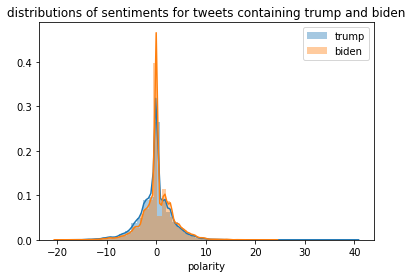

In [16]:
pos = swing_full.loc[swing_full['no_punc'] != 0]
con_trump = pos[pos['no_punc'].str.contains('trump')]['polarity']
con_biden = pos[pos['no_punc'].str.contains('biden')]['polarity']
sns.distplot(con_trump, label = 'trump')
sns.distplot(con_biden, label = 'biden')
plt.legend()
plt.title('distributions of sentiments for tweets containing trump and biden')
print("avg polarity for 'biden': ", np.mean(con_biden))
print("avg polarity for 'trump': ", np.mean(con_trump))

avg polarity for 'biden':  0.16336609336609278
avg polarity for 'trump':  -0.267117537313433


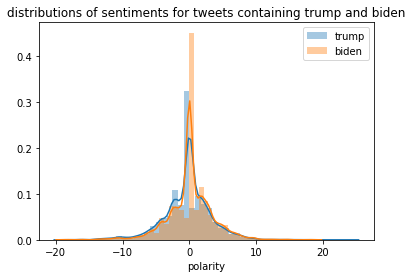

In [17]:
#look at 'biden' vs 'trump' in michigan tweets
pos = michigan.loc[michigan['no_punc'] != 0]
con_trump = pos[pos['no_punc'].str.contains('trump')]['polarity']
con_biden = pos[pos['no_punc'].str.contains('biden')]['polarity']
sns.distplot(con_trump, label = 'trump')
sns.distplot(con_biden, label = 'biden')
plt.legend()
plt.title('distributions of sentiments for tweets containing trump and biden')
print("avg polarity for 'biden': ", np.mean(con_biden))
print("avg polarity for 'trump': ", np.mean(con_trump))

avg polarity for 'biden':  0.37427332993370366
avg polarity for 'trump':  -0.23237623762376539


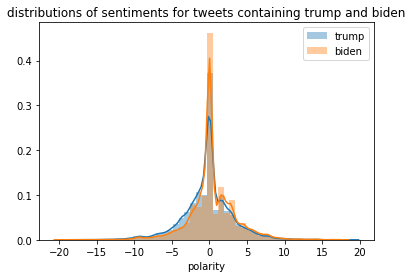

In [18]:
#look at 'biden' vs 'trump' in penn tweets
pos = pennsylvania.loc[pennsylvania['no_punc'] != 0]
con_trump = pos[pos['no_punc'].str.contains('trump')]['polarity']
con_biden = pos[pos['no_punc'].str.contains('biden')]['polarity']
sns.distplot(con_trump, label = 'trump')
sns.distplot(con_biden, label = 'biden')
plt.legend()
plt.title('distributions of sentiments for tweets containing trump and biden')
print("avg polarity for 'biden': ", np.mean(con_biden))
print("avg polarity for 'trump': ", np.mean(con_trump))

avg polarity for 'biden':  0.5266114180478803
avg polarity for 'trump':  0.002625298329355582


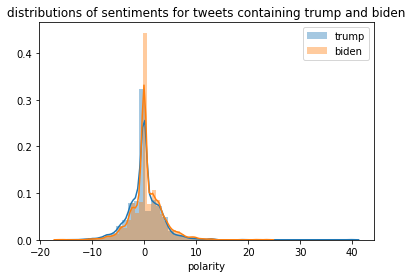

In [19]:
#look at 'biden' vs 'trump' in penn tweets
pos = wisconsin.loc[wisconsin['no_punc'] != 0]
con_trump = pos[pos['no_punc'].str.contains('trump')]['polarity']
con_biden = pos[pos['no_punc'].str.contains('biden')]['polarity']
sns.distplot(con_trump, label = 'trump')
sns.distplot(con_biden, label = 'biden')
plt.legend()
plt.title('distributions of sentiments for tweets containing trump and biden')
print("avg polarity for 'biden': ", np.mean(con_biden))
print("avg polarity for 'trump': ", np.mean(con_trump))

## Using TextBlob


In [20]:
pip install -U textblob

Requirement already up-to-date: textblob in /Users/aisetoyama/opt/anaconda3/lib/python3.7/site-packages (0.15.3)
Note: you may need to restart the kernel to use updated packages.


In [21]:
# The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). 
# The polarity score is a float within the range [-1.0, 1.0]. 
# The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
from textblob import TextBlob

In [22]:
textblob_polarity = []
for tweet in swing_full['no_punc']:
    testimonial = TextBlob(tweet)
    textblob_polarity.append(testimonial.sentiment.polarity)
swing_full['textblob_polarity'] = textblob_polarity
swing_full.head()

/Users/aisetoyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,long,city,country,continent,state,state_code,collected_at,no_punc,polarity,textblob_polarity
139,2020-10-15 00:09:09,1.316532e+18,the 6 most misleading claims from #joebiden: ...,0.0,0.0,Twitter Web App,409571529.0,Howard Wachtel,mindovermath,Retired college #math professor. Single. Brid...,...,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 00:01:14.049301472,the 6 most misleading claims from joebiden ...,-1.7,0.50
233,2020-10-15 00:14:41,1.316533e+18,politico: #biden campaign ‘would not rule out ...,0.0,0.0,Twitter for iPhone,46162219.0,Lost Owl,lostowl62,"Writing, hiking, biking, maps, the Juniata Riv...",...,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:02:03.760720642,politico biden campaign would not rule out ...,0.0,0.00
294,2020-10-15 00:17:46,1.316534e+18,disqualified. withdrawal from the race. #joebi...,1.0,0.0,Twitter for iPhone,412296745.0,TheRealJoeBedridden,Immortal_J,"MBA, MIT Business, DU, Small business owner.",...,-79.923952,Pittsburgh,United States of America,North America,Pennsylvania,PA,2020-10-21 00:02:36.383839473,disqualified withdrawal from the race joebi...,-1.7,0.00
317,2020-10-15 00:19:05,1.316534e+18,#joebiden's homes. the sacrifices of public se...,1.0,2.0,Twitter for Android,90028762.0,Vladz Hammer 🏆 🇺🇸,Vladzhammer,"🎙AMP Podcasting HOF 🏆, CoHost OFR, Conspiracy ...",...,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:02:48.293866983,joebiden s homes the sacrifices of public se...,-1.5,0.12
396,2020-10-15 00:23:31,1.316535e+18,#memes #this #biden https://t.co/enkuzxobqg,0.0,0.0,Twitter for Android,137851125.0,Mandi💙💙💙🌊🌊🌊🦄🦄👽👽❤💚🧡💜,FaerieGlitter21,True and Blue girl from #Michigan #resistance ...,...,-83.046640,Detroit,United States of America,North America,Michigan,MI,2020-10-21 00:03:29.720049625,memes this biden https t co enkuzxobqg,0.0,0.00


avg polarity for 'biden':  0.0752892610458794
avg polarity for 'trump':  0.048446508796753884


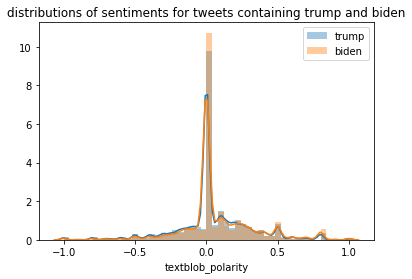

In [23]:
pos = swing_full.loc[swing_full['no_punc'] != 0]
con_trump = pos[pos['no_punc'].str.contains('trump')]['textblob_polarity']
con_biden = pos[pos['no_punc'].str.contains('biden')]['textblob_polarity']
sns.distplot(con_trump, label = 'trump')
sns.distplot(con_biden, label = 'biden')
plt.legend()
plt.title('distributions of sentiments for tweets containing trump and biden')
print("avg polarity for 'biden': ", np.mean(con_biden))
print("avg polarity for 'trump': ", np.mean(con_trump))

avg polarity for 'biden':  0.07039025803051796
avg polarity for 'trump':  0.05527840036686776


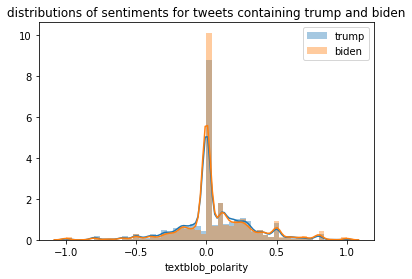

In [24]:
#Michigan - textblob polarity
pos = swing_full[swing_full['state'] == 'Michigan']
con_trump = pos[pos['no_punc'].str.contains('trump')]['textblob_polarity']
con_biden = pos[pos['no_punc'].str.contains('biden')]['textblob_polarity']
sns.distplot(con_trump, label = 'trump')
sns.distplot(con_biden, label = 'biden')
plt.legend()
plt.title('distributions of sentiments for tweets containing trump and biden')
print("avg polarity for 'biden': ", np.mean(con_biden))
print("avg polarity for 'trump': ", np.mean(con_trump))

avg polarity for 'biden':  0.07378627392100236
avg polarity for 'trump':  0.044859817977625935


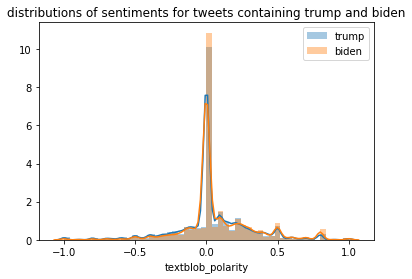

In [25]:
#Pennsylvania - textblob polarity
pos = swing_full[swing_full['state'] == 'Pennsylvania']
con_trump = pos[pos['no_punc'].str.contains('trump')]['textblob_polarity']
con_biden = pos[pos['no_punc'].str.contains('biden')]['textblob_polarity']
sns.distplot(con_trump, label = 'trump')
sns.distplot(con_biden, label = 'biden')
plt.legend()
plt.title('distributions of sentiments for tweets containing trump and biden')
print("avg polarity for 'biden': ", np.mean(con_biden))
print("avg polarity for 'trump': ", np.mean(con_trump))

avg polarity for 'biden':  0.08989716771257032
avg polarity for 'trump':  0.050025443638391086


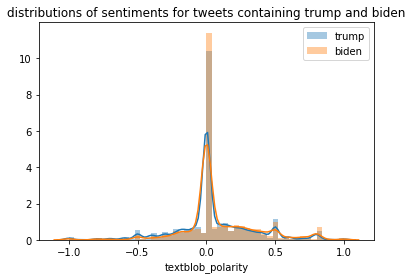

In [26]:
#Wisconsin - textblob polarity
pos = swing_full[swing_full['state'] == 'Wisconsin']
con_trump = pos[pos['no_punc'].str.contains('trump')]['textblob_polarity']
con_biden = pos[pos['no_punc'].str.contains('biden')]['textblob_polarity']
sns.distplot(con_trump, label = 'trump')
sns.distplot(con_biden, label = 'biden')
plt.legend()
plt.title('distributions of sentiments for tweets containing trump and biden')
print("avg polarity for 'biden': ", np.mean(con_biden))
print("avg polarity for 'trump': ", np.mean(con_trump))